# Luis Alejandro Urbina Hernández - Carné 18473

Catedrático: Ing. Luis Valdeavellano

Cátedra: Minería de datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

## Exploración de la Data

In [3]:
data = pd.read_csv("insurance.csv")

In [4]:
data.shape

(348, 7)

In [5]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [6]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


array([[<AxesSubplot:title={'center':'smoker'}>]], dtype=object)

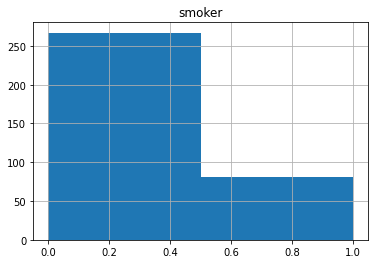

In [8]:
data.hist(column='smoker', bins = 2)

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

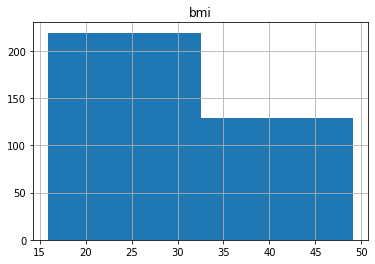

In [10]:
data.hist(column='bmi', bins =2)

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

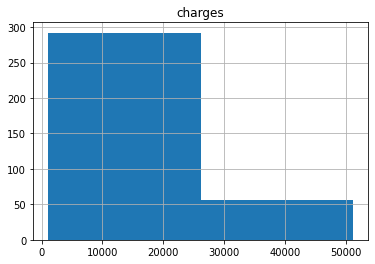

In [11]:
data.hist(column='charges', bins =2)

## Preparación de la data

In [12]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

## Preparación de la data - Datos Categóricos

In [13]:
labelencoder = LabelEncoder()
data['sex_E'] = labelencoder.fit_transform(data['sex'])
data['sex_E']

0      0
1      1
2      1
3      1
4      1
      ..
343    1
344    0
345    0
346    1
347    1
Name: sex_E, Length: 348, dtype: int64

In [14]:
data['smoker_E'] = labelencoder.fit_transform(data['smoker'])
data['smoker_E']

0      1
1      0
2      0
3      0
4      0
      ..
343    0
344    0
345    0
346    0
347    0
Name: smoker_E, Length: 348, dtype: int64

In [15]:
onehotencoder = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(onehotencoder.fit_transform(data[['region']]).toarray())
data = data.join(enc_df)

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_E,smoker_E,0,1,2,3
0,19,0,27.900,0,1,3,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,2,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,2,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,1,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,1,3866.85520,1,0,0.0,1.0,0.0,0.0


## Dividir en Training Y Test

In [18]:
p_train = 0.5

In [19]:
train = data[:int((len(data))*p_train)]
test = data[int((len(data))*p_train):]

## Preparación de los datos - escala

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit_transform(data)

array([[-1.43036576, -1.01739261, -0.49424524, ..., -0.56850147,
        -0.61277571,  1.80108368],
       [-1.49982813,  0.98290472,  0.550655  , ..., -0.56850147,
         1.63191847, -0.55522129],
       [-0.80520451,  0.98290472,  0.41358972, ..., -0.56850147,
         1.63191847, -0.55522129],
       ...,
       [-0.38843033, -1.01739261, -0.25215592, ..., -0.56850147,
         1.63191847, -0.55522129],
       [-0.4578927 ,  0.98290472,  0.90310857, ..., -0.56850147,
         1.63191847, -0.55522129],
       [ 0.44511801,  0.98290472,  0.47500209, ..., -0.56850147,
        -0.61277571, -0.55522129]])

## Modelación Lineal

In [22]:
X = train['charges'].values
Y = train['bmi'].values

In [23]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)

In [24]:
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
m = numerator / denominator
c = mean_y - (m * mean_x)

In [25]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
x = np.linspace(min_x, max_x, 1000)
y = c + m * x

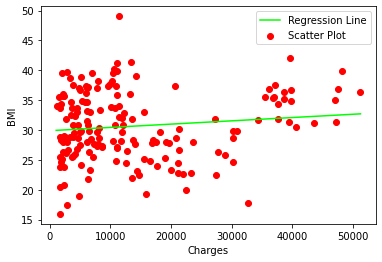

In [26]:
plt.plot(x, y, color='#00ff00', label='Regression Line')
plt.scatter(X, Y, c='#ff0000', label='Scatter Plot')
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.legend()
plt.show()

## Con variables distintas

In [27]:
Y = train['age'].values
mean_y = np.mean(Y)

In [28]:
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
m = numerator / denominator
c = mean_y - (m * mean_x)

In [29]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = c + m * x

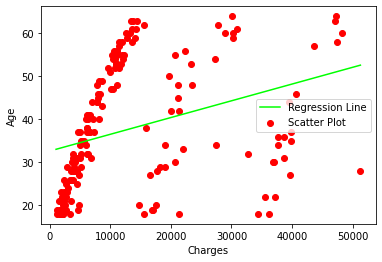

In [30]:
plt.plot(x, y, color='#00ff00', label='Regression Line')
plt.scatter(X, Y, c='#ff0000', label='Scatter Plot')
 
plt.xlabel('Charges')
plt.ylabel('Age')
plt.legend()
plt.show()

## Evaluación de los modelos

#### MAE

In [31]:
y_train = train['bmi'].values
y_test = test['bmi'].values
mean_absolute_error(y_train, y_test)

6.228620689655171

In [32]:
y_train = train['age'].values
y_test = test['age'].values
mean_absolute_error(y_train, y_test)

18.57471264367816

#### MSE

In [33]:
y_train = train['bmi'].values
y_test = test['bmi'].values
mean_squared_error(y_train, y_test)

62.84041379310344

In [34]:
y_train = train['age'].values
y_test = test['age'].values
mean_squared_error(y_train, y_test)

489.9080459770115

#### RMSE

In [35]:
y_train = train['bmi'].values
y_test = test['bmi'].values
math.sqrt(mean_squared_error(y_train, y_test))

7.9271945726784985

In [36]:
y_train = train['age'].values
y_test = test['age'].values
math.sqrt(mean_squared_error(y_train, y_test))

22.133866494063152

## Regresión Polinomial

### Primer modelo

In [37]:
X = train['charges']
Y = train['bmi']
X_seq = np.linspace(X.min(),X.max(),174).reshape(-1,1)

In [38]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_seq,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

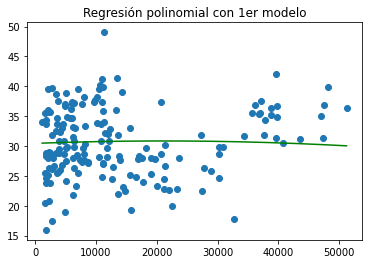

In [39]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X_seq,polyreg.predict(X_seq),color="green")
plt.title("Regresión polinomial con 1er modelo")
plt.show()

#### Segundo Modelo

In [40]:
X = train['charges']
Y = train['age']
X_seq = np.linspace(X.min(),X.max(),174).reshape(-1,1)

In [41]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_seq,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

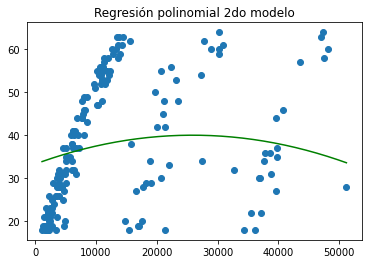

In [42]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X_seq,polyreg.predict(X_seq),color="green")
plt.title("Regresión polinomial 2do modelo")
plt.show()